In [15]:
import sys
import gym
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from algorithm.ddpg import DDPGagent
from utils import *
from algorithm.environment import MyEnv
from algorithm.OUNoise import OUNoise
from torch import nn
from src.model import *
import torch
PARENT_PATH = 'weight'
ACTOR_PATH = 'weight/actor'

<!--class Loss(nn.Module):
    def __init__(self, sequence_length):
        super(Loss, self).__init__()
        weight = 2**torch.arange(sequence_length,0,-1)
        self.register_buffer('weight', weight)
    def forward(self, forecast, actual):
        s = forecast.mul(actual.unsqueeze(1)).sum(-1)
        loss = s.mul(self.weight)
        return -loss.mean()-->

In [16]:
rating = pd.read_csv('dataset/Data_Acc_Item.csv')
item = pd.read_csv('dataset/Item_inf.csv',index_col = 'Unnamed: 0')
user = pd.read_csv('dataset/train_acc_inf.csv')
env = MyEnv(rating.sort_values('Date',ignore_index = True),item,user)
agent = DDPGagent(env, max_memory_size = 10000)
noise = OUNoise(env.action_space)
actor = Actor(env.observation_space.shape[1],env.observation_space.shape[0],env.action_space.shape[0],env.action_space.shape[1])
actor.load_state_dict(torch.load(ACTOR_PATH))

Actor(
  (Linear): Linear(in_features=576, out_features=576, bias=True)
  (Activation): Softmax(dim=-1)
) Critic(
  (encode_state): LSTM(576, 576, batch_first=True)
  (hidden_layer): Sequential(
    (0): Linear(in_features=2304, out_features=576, bias=True)
    (1): ReLU()
    (2): Linear(in_features=576, out_features=576, bias=True)
    (3): ReLU()
    (4): Linear(in_features=576, out_features=576, bias=True)
    (5): ReLU()
    (6): Linear(in_features=576, out_features=576, bias=True)
    (7): ReLU()
  )
  (output_layer): Linear(in_features=576, out_features=1, bias=True)
)


<All keys matched successfully>

<!--loss = Loss(env.action_space.shape[0])
actor_optimizer  = torch.optim.Adam(actor.parameters(), lr=0.001)
batch_size = 128
rewards = []
avg_rewards = []

for episode in range(20):
    env.idx_current = 500000
    state = env.get_observation()
    noise.reset()
    episode_reward = 0
    
    for step in range(137600):
        action = actor(state).detach().numpy()
        #action = noise.get_action(action, step)
        action = agent.from_probability_distribution_to_action(action)
        new_state, reward, done, _ = env.step(action)
        agent.memory.push(state, action, reward, new_state, done)
        
        if len(agent.memory) > batch_size:
            action = actor(state).detach().numpy()
            states, _ , _rewards, next_states, _ = agent.memory.sample(batch_size)
            states = torch.FloatTensor(states)
            next_states = torch.FloatTensor(next_states)
            actions = actor(states)
            actor_loss = loss(actions,next_states[:,-1,:])
            actor_optimizer.zero_grad()
            actor_loss.backward()
            actor_optimizer.step()
            
        state = env.get_observation()
        episode_reward += reward
        print('step {} in episode {} : reward is {}'.format(step, episode, reward))

    rewards.append(episode_reward)
    avg_rewards.append(np.mean(rewards[-10:]))

plt.plot(rewards)
plt.plot(avg_rewards)
plt.plot()
plt.xlabel('Episode')
plt.ylabel('Reward')
plt.show()
-->

In [18]:
import os
if not os.path.exists(PARENT_PATH):
    os.mkdir(PARENT_PATH)
torch.save(actor.state_dict(), ACTOR_PATH)

In [19]:
# các user được test từ tháng 10 nên sẽ chạy từ index 384456 đến index 522015
env.idx_current = 384456
episode_reward = 0
step = 0
ap=0
avg_rewards = []
T=rating.sort_values('Date',ignore_index = True).iloc
while True:
    print(env.idx_current)
    state = env.get_observation()
    if env.idx_current == 0:
        break
    action = actor(state).detach().numpy()
    action = agent.from_probability_distribution_to_action(action)
    new_state, reward, done, _ = env.step(action)
    action = env.encode.inverse_transform(action).tolist()
    print(env.idx_current)
    indexes = [j for j,x in enumerate(action) if x[0] == T[env.idx_current]["ItemID"]]
    if len(indexes)!=0:
        ap += ((1/(indexes[0]+1)))
    episode_reward += reward
    step += 1
    print('step {} : reward is {}'.format(step, reward))
    avg_rewards.append(episode_reward / step)
plt.plot(avg_rewards)

384456
384457
step 1 : reward is 3
384457
384458
step 2 : reward is 2
384458
384459
step 3 : reward is 3
384459
384460
step 4 : reward is 3
384460
384461
step 5 : reward is 3
384461
384462
step 6 : reward is 3
384462
384463
step 7 : reward is 2
384463
384464
step 8 : reward is 2
384464
384465
step 9 : reward is 3
384465
384466
step 10 : reward is 2
384466
384467
step 11 : reward is 3
384467
384468
step 12 : reward is 3
384468
384469
step 13 : reward is 0
384469
384470
step 14 : reward is 0
384470
384471
step 15 : reward is 3
384471
384472
step 16 : reward is 3
384472
384473
step 17 : reward is 3
384473
384474
step 18 : reward is 3
384474
384475
step 19 : reward is 0
384475
384476
step 20 : reward is 3
384476
384477
step 21 : reward is 3
384477
384478
step 22 : reward is 0
384478
384479
step 23 : reward is 3
384479
384480
step 24 : reward is 3
384480
384481
step 25 : reward is 3
384481
384482
step 26 : reward is 1
384482
384483
step 27 : reward is 2
384483
384484
step 28 : reward is 3
3

KeyboardInterrupt: 

In [16]:
# chỉ số map@3
map = ap/137558
map

0.7804671484023278

In [19]:
# chỉ số accuracy
accuracy = avg_rewards[137557]/3
accuracy

0.798942991320025

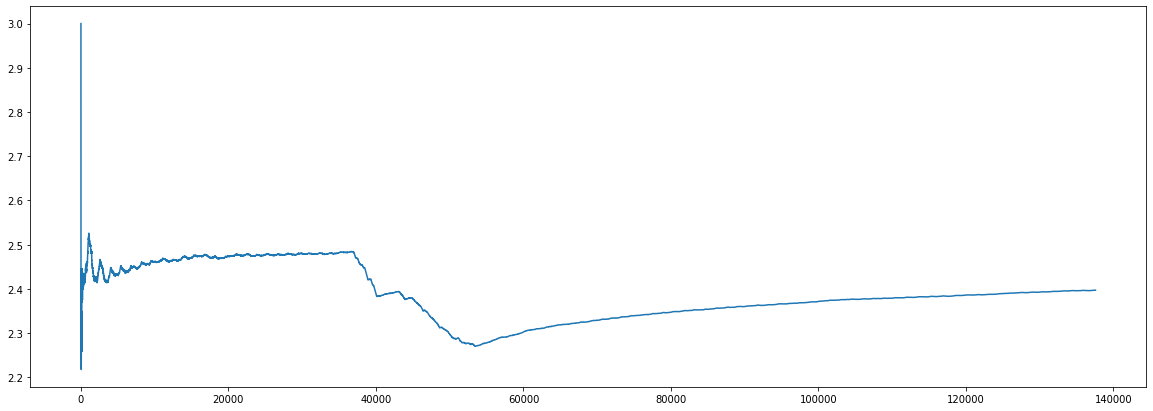

In [14]:
# Đồ thị biểu diễn sự thay đổi của reward trung bình nhận được
plt.figure(figsize = (20,7))
plt.plot(avg_rewards)

In [20]:
# Gợi ý 3 item cho 1 user nào đó
# pick 1 index để dự đoán thuộc (384456;522015)
env.idx_current = 396444
state = env.get_observation()
# trạng thái hiện tại
print("Chuỗi hành động trong quá khứ : ",env.encode.inverse_transform(state).T)
# action gợi ý
action = actor(state).detach().numpy()
action = agent.from_probability_distribution_to_action(action)
print("Các items gợi ý : ",env.encode.inverse_transform(action).T)
# next state và reward
new_state, reward, done, _ = env.step(action)
print("Chuỗi hành động mới : ",env.encode.inverse_transform(new_state).T)
print("Reward đạt được nếu thực hiện action : ",reward)

Chuỗi hành động trong quá khứ :  [['IID257' 'IID257' 'IID257' 'IID257' 'IID257' 'IID257' 'IID257' 'IID257'
  'IID10' 'IID122' 'IID103' 'IID257' 'IID257' 'IID257' 'IID257' 'IID257'
  'IID257' 'IID10' 'IID257' 'IID257']]
Các items gợi ý :  [['IID257' 'IID10' 'IID103']]
Chuỗi hành động mới :  [['IID257' 'IID257' 'IID257' 'IID257' 'IID257' 'IID257' 'IID257' 'IID10'
  'IID122' 'IID103' 'IID257' 'IID257' 'IID257' 'IID257' 'IID257' 'IID257'
  'IID10' 'IID257' 'IID257' 'IID257']]
Reward đạt được nếu thực hiện action :  3


In [21]:
# giá trị thật trong bảng số liệu
T=rating.sort_values('Date',ignore_index = True).iloc[env.idx_current]
T

Date         2010-10-09
ItemID           IID257
AccountID      AID22589
Money        434.782609
Name: 396445, dtype: object